# Data extraction and processing
see here for API tutorial on selecting data
http://docs.synapse.org/rest/org/sagebionetworks/repo/web/controller/TableExamples.html

In [1]:
import synapseclient

In [2]:
syn=synapseclient.login()

Welcome, Luca Lonini!



In [3]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
syntable = syn.tableQuery("SELECT * from syn10495809")

In [5]:
table = syntable.asDataFrame()

In [6]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5168 entries, 25819_22 to 30986_23
Data columns (total 11 columns):
dataFileHandleId     5168 non-null int64
device               5168 non-null object
patient              5168 non-null object
session              5168 non-null int64
site                 5168 non-null object
task                 5168 non-null object
visit                5168 non-null int64
deviceSide           5168 non-null object
tremorScore          3667 non-null float64
dyskinesiaScore      1556 non-null float64
bradykinesiaScore    3016 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.5+ KB


In [7]:
table.head()

,dataFileHandleId,device,patient,session,site,task,visit,deviceSide,tremorScore,dyskinesiaScore,bradykinesiaScore
25819_22,17286028,GENEActiv,13_BOS,1,Boston,drnkg,1,Right,1.0,NaN,1.0
25820_22,17286030,Pebble,13_BOS,1,Boston,drnkg,1,Left,1.0,NaN,1.0
25821_22,17286034,GENEActiv,13_BOS,1,Boston,fldng,1,Right,2.0,NaN,1.0
25822_22,17286036,Pebble,13_BOS,1,Boston,fldng,1,Left,1.0,NaN,1.0
25823_22,17286039,GENEActiv,13_BOS,1,Boston,ftnl1,1,Right,NaN,0.0,NaN


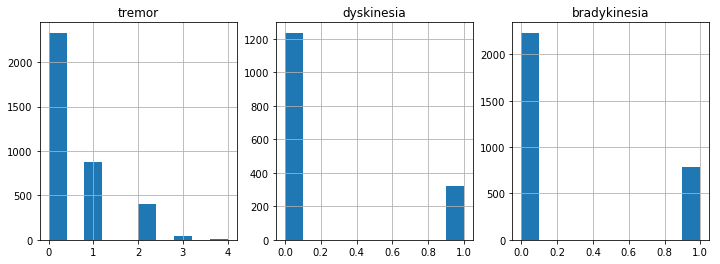

In [8]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(131)
plt.title('tremor')
table.tremorScore.hist()
ax = fig.add_subplot(132)
table.dyskinesiaScore.hist()
plt.title('dyskinesia')
ax = fig.add_subplot(133)
table.bradykinesiaScore.hist()
plt.title('bradykinesia')

In [9]:
table.task.unique()

array(['drnkg', 'fldng', 'ftnl1', 'ftnl2', 'ftnr1', 'ftnr2', 'ntblt',
       'orgpa', 'raml1', 'raml2', 'ramr1', 'ramr2'], dtype=object)

In [10]:
sum(table.tremorScore==4)

12

# Extract data for Dyskinesia

# Extract data for Tremor

In [38]:
q_tremor = syn.tableQuery("SELECT * from syn10495809 where tremorScore is not null")

In [39]:
Train_tremor = q_tremor.asDataFrame()

In [40]:
Train_tremor.head()

,dataFileHandleId,device,patient,session,site,task,visit,deviceSide,tremorScore,dyskinesiaScore,bradykinesiaScore
25819_22,17286028,GENEActiv,13_BOS,1,Boston,drnkg,1,Right,1,NaN,1.0
25820_22,17286030,Pebble,13_BOS,1,Boston,drnkg,1,Left,1,NaN,1.0
25821_22,17286034,GENEActiv,13_BOS,1,Boston,fldng,1,Right,2,NaN,1.0
25822_22,17286036,Pebble,13_BOS,1,Boston,fldng,1,Left,1,NaN,1.0
25824_22,17286042,Pebble,13_BOS,1,Boston,ftnl1,1,Left,2,NaN,1.0


In [56]:
data = {}
for file_handle_id, path in paths_train.items():
        with open(path) as f:
            data[file_handle_id] = f.read()

In [11]:
# q = syn.tableQuery("SELECT * from syn10495809 where tremorScore > 3")
q = syn.tableQuery("SELECT * from syn10495809 LIMIT 100")
paths_train = syn.downloadTableColumns(q,'dataFileHandleId')

In [12]:
df_train = q.asDataFrame()
df_train['path']=df_train.dataFileHandleId.astype(str).map(paths_train)

In [13]:
df_train.head()

,dataFileHandleId,device,patient,session,site,task,visit,deviceSide,tremorScore,dyskinesiaScore,bradykinesiaScore,path
25819_22,17286028,GENEActiv,13_BOS,1,Boston,drnkg,1,Right,1.0,NaN,1.0,/Users/luca/.synapseCache/28/17286028/drnkg_GE...
25820_22,17286030,Pebble,13_BOS,1,Boston,drnkg,1,Left,1.0,NaN,1.0,/Users/luca/.synapseCache/30/17286030/drnkg_Pe...
25821_22,17286034,GENEActiv,13_BOS,1,Boston,fldng,1,Right,2.0,NaN,1.0,/Users/luca/.synapseCache/34/17286034/fldng_GE...
25822_22,17286036,Pebble,13_BOS,1,Boston,fldng,1,Left,1.0,NaN,1.0,/Users/luca/.synapseCache/36/17286036/fldng_Pe...
25823_22,17286039,GENEActiv,13_BOS,1,Boston,ftnl1,1,Right,NaN,0.0,NaN,/Users/luca/.synapseCache/39/17286039/ftnl1_GE...


In [15]:
p1 = df_train.path[0]

In [20]:
rawdata = pd.read_csv(p1,sep='\t')

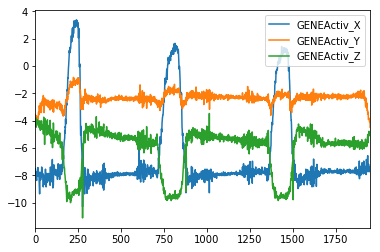

In [24]:
rawdata.iloc[:,1:4].plot()

In [25]:
rawdata.head()

,timestamp,GENEActiv_X,GENEActiv_Y,GENEActiv_Z,GENEActiv_Magnitude
0,1.434973e+09,-7.51189,-3.56766,-4.28453,9.35489
1,1.434973e+09,-7.55112,-3.95894,-4.05407,9.44077
2,1.434973e+09,-7.86689,-4.15409,-3.78537,9.66817
3,1.434973e+09,-7.86690,-4.27178,-4.13055,9.85889
4,1.434973e+09,-7.90612,-3.88050,-4.36101,9.82769
